<center> <h1>Numerical Methods  -- Assignment 6</h1> </center>

## Problem 1 -- Minimisation

### (a) Brent's method 

In numerical analysis, Brent's method is a root-finding algorithm combining the bisection method, the secant method and inverse quadratic interpolation. It has the reliability of bisection but it can be as quick as some of the less-reliable methods. Now given the following function:
\begin{equation}
f(x) = \frac{(x+3)^2}{2}+\frac{x-5}{3}-\frac{10}{4}
\end{equation}

The minimum of the function is found to be: -3.33333338268


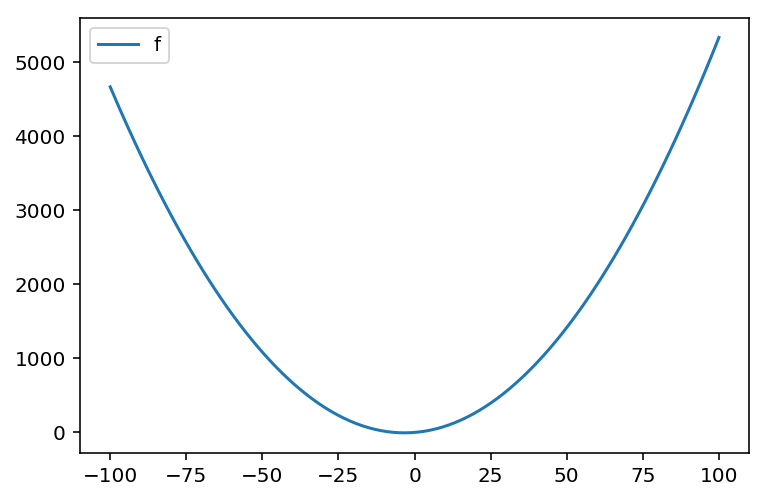

In [1]:
%config InlineBackend.figure_format = 'retina' 
from scipy.optimize import brent
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: 0.5*np.power(x+3,2)+(x-5)/3-10./4
minimum = brent(f,brack=(-100,100))
x = np.linspace(-100,100,100)
y = f(x)
print "The minimum of the function is found to be:",minimum
#Plot to check the shape of the function
plt.plot(x,y,'-')
plt.legend('f(x)')
plt.show()

### (b) Conjugate gradient method

$$f(x,y) = 0.26((x+0.5)^2+(y-1)^2)-0.48xy$$

In [2]:
from scipy.optimize import fmin_cg,minimize

def func(x):
    return 0.26*((x[0]+0.5)**2+(x[1]-1)**2)-0.48*x[0]*x[1]

def fprime(x):
    return np.array((0.26*2*(x[0]+0.5)-0.48*x[1],0.26*2*(x[1]-1)-0.48*x[0]))
fc = lambda x: 0.26*(np.power(x[0]+0.5,2)+np.power(x[1]-1,2))-0.48*x[0]*x[1]
fp = lambda x: np.array((0.26*2*(x[0]+0.5)-0.48*x[1],0.26*2*(x[1]-1)-0.48*x[0]))
x0 = [2,5]
fmin = minimize(fc,x0,jac=fp,method='CG')
print "The minimum of the function is found at (x,y)=:",fmin.x

The minimum of the function is found at (x,y)=: [ 2.86015324  3.64015324]


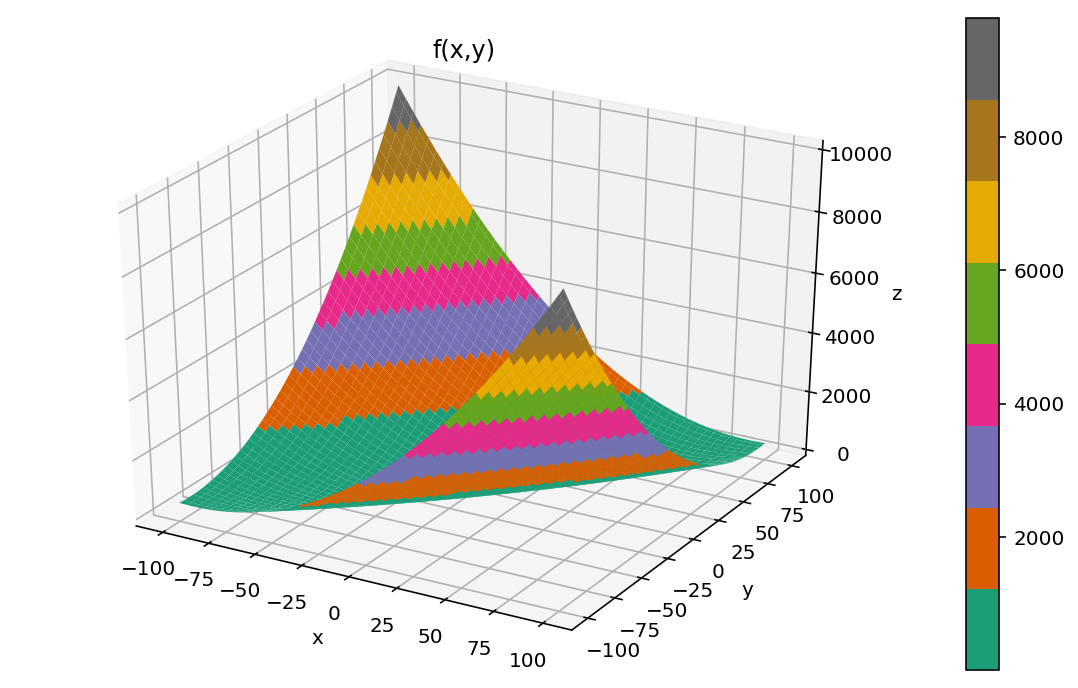

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure, show
import numpy as np

x = np.linspace(-100,100,100)
y = x
xx,yy = np.meshgrid(x,y)
X = [xx,yy]
zz = func(X)
#plot
fig = plt.figure(figsize=(10,6))
frame = fig.add_subplot(1,1,1,projection ='3d')
surf = frame.plot_surface(xx,yy,zz,cmap='Dark2')
frame.set_xlabel('x')
frame.set_ylabel('y')
frame.set_zlabel('z')
frame.set_title('f(x,y)')
fig.colorbar(surf,ax=frame)
show()

## Problem 2 -- x,y data

The $\textit{Maximum Likelihood}$ is done by minimizing the log-likelihood function.
$$ln\,L = -\frac{1}{2}\sum_{i=1}^{N}\left(\frac{(data-model)^2}{2\sigma^2}+ln\,(2\pi\sigma^2)\right)$$,
where the model is described by $y = kx+m$, and $\sigma^2 = yerr^2+f^2(kx+m)^2$.

First use $\chi^2$ fitting and reduced $\chi^2$ to get a reference of the values of parameters.

In [4]:
from kapteyn import kmpfit

data = np.genfromtxt('Downloads/table_1.dat')
x = data[:,0]
y = data[:,1]
ey = data[:,2]
#define a model function, since assuming linear correlation
def model(params, x):
    a, b = params 
    return a + b*x

# A residuals function
def residuals(p, data):  # Residuals function needed by kmpfit
    x, y, err= data
    return (y - model(p,x))/err


p0 = (1, 1)
fitobj = kmpfit.Fitter(residuals=residuals, data=(x,y,ey))
status = fitobj.fit(params0=p0)
print("Was fit successful?", bool(status))

a, b = fitobj.params
da, db = fitobj.stderr
s = u"Model parameters a={} \u00B1 {} and b={} \u00B1 {}".format(a, da, b, db)
print(s)
print("Chi squared, reduced Chi squared:", fitobj.chi2_min, fitobj.rchi2_min)
print("The errors derived from the covariance matrix:", fitobj.xerror)



('Was fit successful?', True)
Model parameters a=3.63163709836 ± 0.657618505171 and b=0.528201941419 ± 0.106155936616
('Chi squared, reduced Chi squared:', 4033.3942262757655, 84.02904638074511)
('The errors derived from the covariance matrix:', array([ 0.07173966,  0.01158056]))


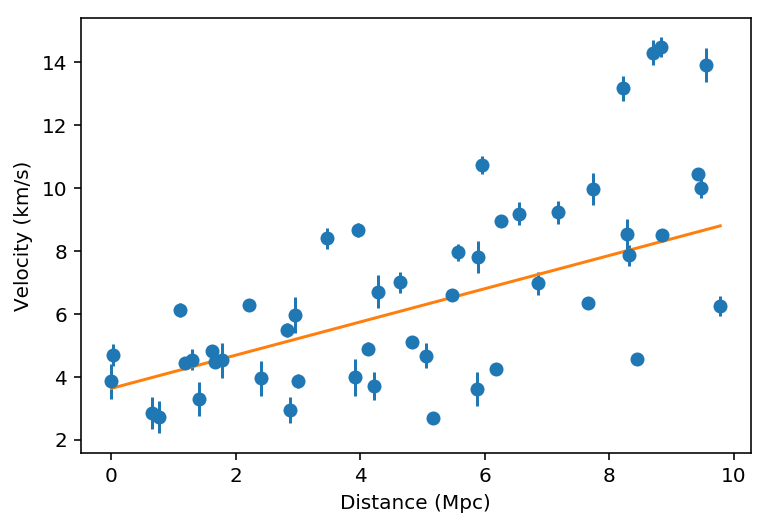

In [5]:
from matplotlib.pyplot import figure, show

fig = figure()
frame = fig.add_subplot(1,1,1)
frame.errorbar(x, y, yerr=ey,marker='o', ls='')
xmin = x.min(); xmax = x.max()
p = (a,b)
ymin = model(p,xmin); ymax = model(p,xmax)
frame.plot([xmin, xmax], [ymin, ymax])
frame.set_xlabel('Distance (Mpc)')
frame.set_ylabel('Velocity (km/s)')
show()

### (a) -- Optimal parameters

In [10]:
from math import *
import time

def log_like(params,x,y,ey):
    k,m,f = params
    sig = np.sqrt(ey**2+(f*(k*x+m))**2)
    L = ((k*x+m)-y)**2/(sig**2)+np.log(2*pi*sig**2)
    return 0.5*np.sum(L)
#minimize via three methods
t1 = time.time()
l_BFGS = minimize(log_like,x0=[0,0,0],args=(x,y,ey),method='BFGS')
t2 = time.time()
t3 = time.time()
l_NM = minimize(log_like,x0=[0,0,0],args=(x,y,ey),method='Nelder-Mead')
t4 = time.time()
t5 = time.time()
l_CG = minimize(log_like,x0=[0,0,0],args=(x,y,ey),method='CG')
t6 = time.time()
print '%6s %6s %6s %6s %12s %12s' % ("Methods","k","m","f","time","Success")
print '%6s %.7f %.7f %.7f %.6f %8s' % ("BFGS",l_BFGS.x[0],l_BFGS.x[1],l_BFGS.x[2],t2-t1,l_BFGS.success)
print '%6s %.7f %.7f %.7f %.6f %8s' % ("NM",l_NM.x[0],l_NM.x[1],np.abs(l_NM.x[2]),t4-t3,l_NM.success)
print '%6s %.7f %.7f %.7f %.6f %8s' % ("CG",l_CG.x[0],l_CG.x[1],l_CG.x[2],t6-t5,l_CG.success)

Methods      k      m      f         time      Success
  BFGS 0.6850430 3.3064525 0.2998975 0.014389     True
    NM 0.6850535 3.3064455 0.2998962 0.021051     True
    CG 0.6850429 3.3064530 0.2998975 0.013389     True


The table printed above listed the optimization results via the three methods. In this case CG method performs the fastest. All three methods uses x,y and error in y to minimize the log-likelihood function.

### (b) -- Plot fitting

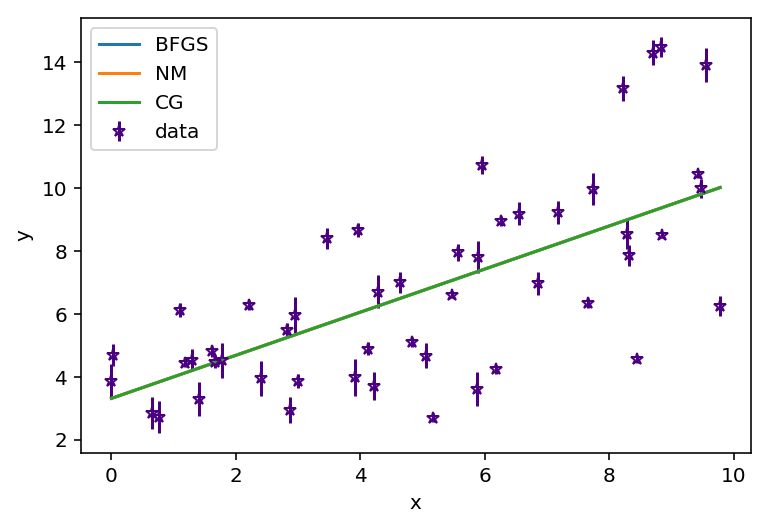

In [43]:
fig = figure()
frame = fig.add_subplot(1,1,1)
frame.errorbar(x, y, yerr=ey,marker='*', fillstyle='none',ls='',color='indigo')
xmin = x.min(); xmax = x.max()
p1 = [l_BFGS.x[1],l_BFGS.x[0]]
p2 = [l_NM.x[1],l_NM.x[0]]
p3 = [l_CG.x[1],l_CG.x[0]]
ymin1 = model(p1,xmin); ymax1 = model(p1,xmax)
ymin2 = model(p2,xmin); ymax2 = model(p2,xmax)
ymin3 = model(p3,xmin); ymax3 = model(p3,xmax)
frame.plot([xmin, xmax], [ymin1, ymax1])
frame.plot([xmin, xmax], [ymin1, ymax1])
frame.plot([xmin, xmax], [ymin1, ymax1])
frame.set_xlabel('x')
frame.set_ylabel('y')
frame.legend(['BFGS','NM','CG','data'])
show()

Notice that because of small deviations the three fits overlay on each other and is not distinguashiable on the graph above.

## Problem 3 -- Dispersion relation

In [12]:
data = np.genfromtxt('./Downloads/table_2.dat')
x = data[:,0]
y = data[:,1]
v = data[:,2]
ve = data[:,3]

### (a) -- Minimization

In [25]:
def L(params, x,y,v,ve):
    e0, vsys = params               
    v_model = vsys    #model without A                    
    sigma = np.sqrt(e0**2 + ve**2)                          
    L = ((v - v_model)**2/ (sigma**2) + np.log(2*pi*sigma**2))
    return 0.5 * np.sum(L)        
log_BFGS = minimize(L,x0=[1,1],args=(x,y,v,ve))
print "Was minimization successful?",log_BFGS.success
print '%6s %6s' % ('sig0(rad)','v_sys(km/s)')
print '%.3f %.3f' % (log_BFGS.x[0],log_BFGS.x[1])


Was minimization successful? True
sig0(rad) v_sys(km/s)
127.074 134.081


### (b) -- Minimization (with $A$ and $\theta_0$)

In [23]:
def logL(params,x,y,v,ve):
    e0, vsys, A, theta0 = params 
    theta = np.arctan2(y,x)
    v_model = vsys + A*np.sin(theta-theta0)    #model with A                    
    sigma = np.sqrt(e0**2 + ve**2)                          
    L = ((v - v_model)**2/ (sigma**2) + np.log(2*pi*sigma**2))
    return 0.5 * np.sum(L)  

ln_BFGS = minimize(logL,x0=[1,1,1,1],args=(x,y,v,ve))
print "Was minimization successful?",ln_BFGS.success
print '%6s %6s %4s %8s' % ('sig0(rad)','v_sys(km/s)','A(km/s)','theta0(rad)')
print '%.6f %.6f %.6f %.6f' % (ln_BFGS.x[0],ln_BFGS.x[1],ln_BFGS.x[2],ln_BFGS.x[3])



Was minimization successful? True
sig0(rad) v_sys(km/s) A(km/s) theta0(rad)
120.918200 132.610064 56.638726 0.812978


### (c) -- MCMC

In [27]:
import emcee

def LMC(params,x,y,v,ve):                         
    e0, vsys, A, theta0 = params 
    theta = np.arctan2(y,x)
    v_model = vsys + A*np.sin(theta-theta0)                                               
    sigma = np.sqrt(e0**2 + ve**2)                          
    L = ((v - v_model)**2/ (sigma**2) + np.log(2*pi*sigma**2))
    if A > 0: #A stays positive
        return -0.5 * np.sum(L)
    else:
        return -np.inf
nwalkers, ndim = 500, 4
p0 = np.zeros(shape=(500,4))
for i in range(500):
    p0[i,0] = ln_BFGS.x[0]+1e-4*np.random.uniform(-ln_BFGS.x[0]/10, ln_BFGS.x[0]/10)
    p0[i,1] = ln_BFGS.x[1]+1e-4*np.random.uniform(-ln_BFGS.x[1]/10, ln_BFGS.x[1]/10)
    p0[i,2] = ln_BFGS.x[2]+1e-4*np.random.uniform(-ln_BFGS.x[2]/10, ln_BFGS.x[2]/10)
    p0[i,3] = ln_BFGS.x[3]+1e-6*np.random.uniform(-ln_BFGS.x[3]/10, ln_BFGS.x[3]/10)    
    
l = emcee.EnsembleSampler(nwalkers, ndim, LMC, args=[x,y,v,ve])

MCMC = l.run_mcmc(p0, 500)
e0 = [i[0] for i in MCMC[0]]
vsys = [i[1] for i in MCMC[0]]     
A = [i[2] for i in MCMC[0]]
theta0 = [i[3] for i in MCMC[0]]

#print the result
print '%6s %6s %4s %8s' % ('sig0(rad)','v_sys(km/s)','A(km/s)','theta0(rad)')
print '%.6f %.6f %.6f %.6f' % (np.mean(e0),np.mean(vsys),np.mean(A),np.mean(theta0))


sig0(rad) v_sys(km/s) A(km/s) theta0(rad)
124.025509 131.732557 54.471844 0.806364


### (d) -- Histogram

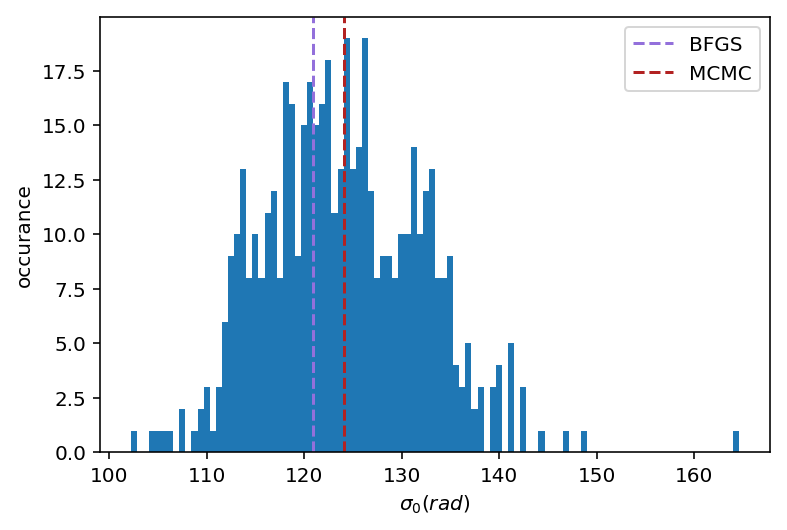

In [33]:
plt.hist(e0, bins=100)
plt.xlabel(r"$\sigma_0(rad)$")
plt.ylabel('occurance')
plt.axvline(x=ln_BFGS.x[0],color='#9370db',ls='--')
plt.axvline(x=np.mean(e0),color='#b22222',ls='--')
plt.legend(['BFGS','MCMC'])
plt.show()

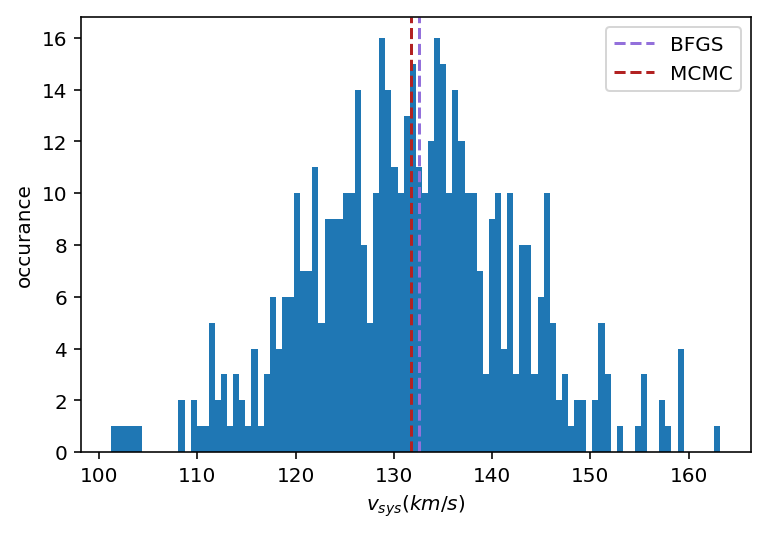

In [34]:
plt.hist(vsys, bins=100)
plt.xlabel(r"$v_{sys}(km/s)$")
plt.ylabel('occurance')
plt.axvline(x=ln_BFGS.x[1],color='#9370db',ls='--')
plt.axvline(x=np.mean(vsys),color='#b22222',ls='--')
plt.legend(['BFGS','MCMC'])
plt.show()

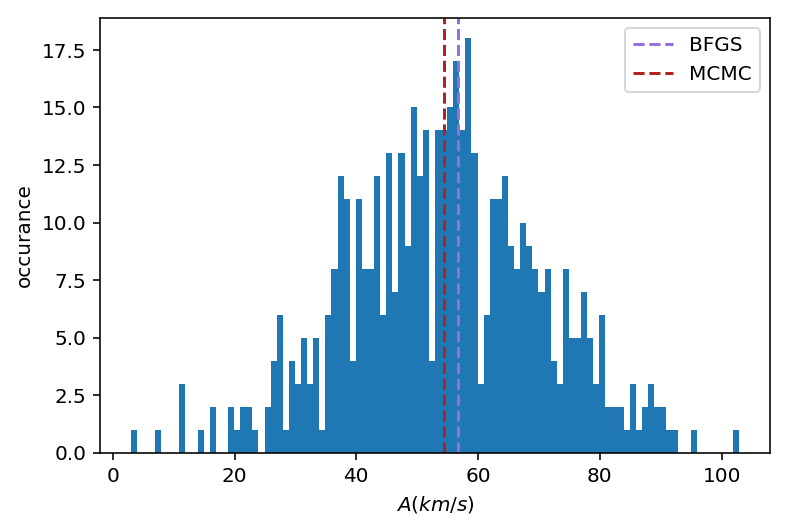

In [35]:
plt.hist(A, bins=100)
plt.xlabel(r"$A(km/s)$")
plt.ylabel('occurance')
plt.axvline(x=ln_BFGS.x[2],color='#9370db',ls='--')
plt.axvline(x=np.mean(A),color='#b22222',ls='--')
plt.legend(['BFGS','MCMC'])
plt.show()

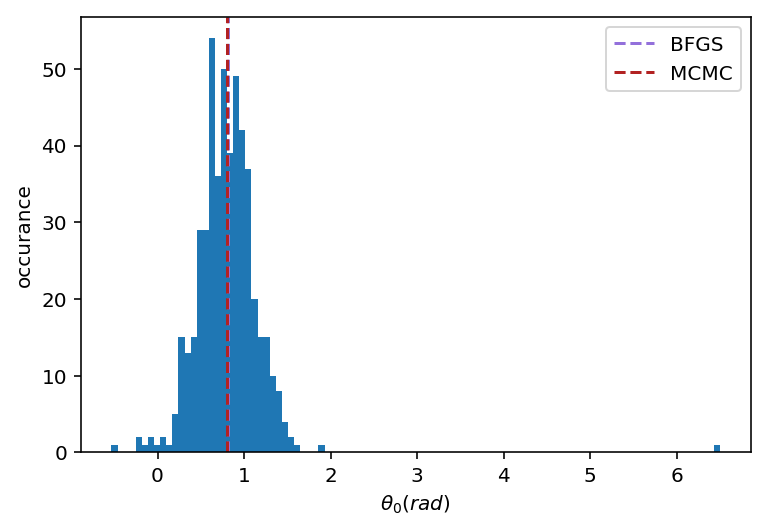

In [36]:
plt.hist(theta0, bins=100)
plt.xlabel(r"$\theta_0(rad)$")
plt.ylabel('occurance')
plt.axvline(x=ln_BFGS.x[3],color='#9370db',ls='--')
plt.axvline(x=np.mean(theta0),color='#b22222',ls='--')
plt.legend(['BFGS','MCMC'])
plt.show()

### (e) -- $v_{rot} \ vs \theta$

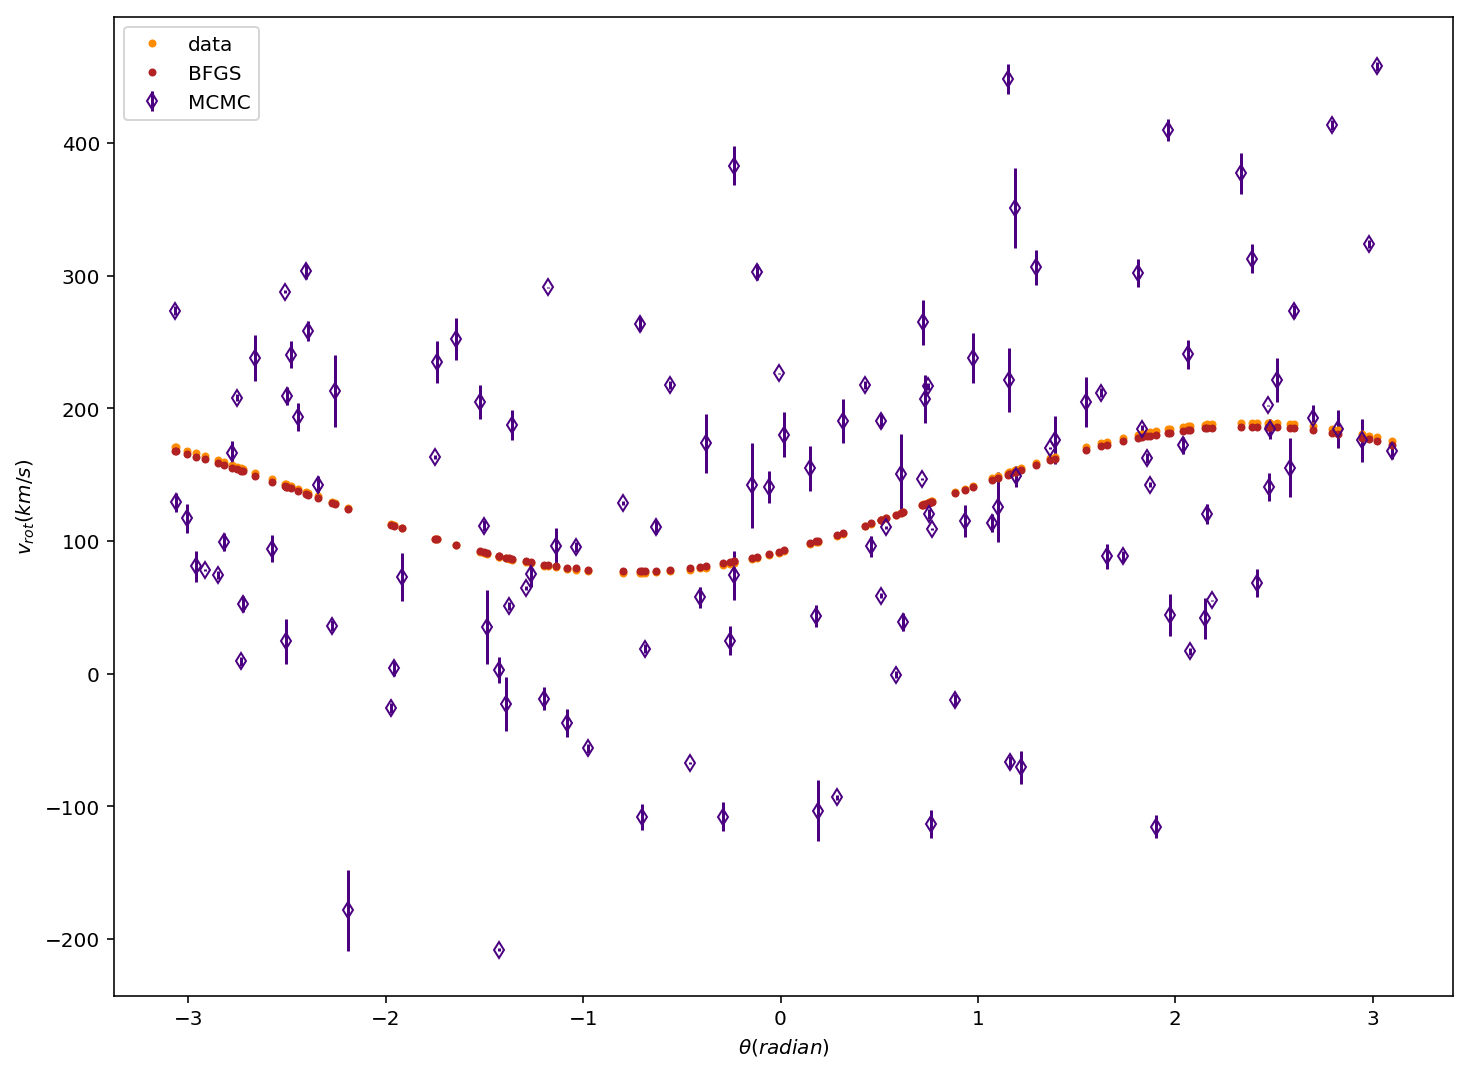

In [32]:
from matplotlib.pyplot import figure,show

params1 = [ln_BFGS.x[1],ln_BFGS.x[2],ln_BFGS.x[3]]
params2 = [np.mean(vsys),np.mean(A),np.mean(theta0)]

def v_model(params,x,y):
    vsys, A, theta0 = params
    theta = np.arctan2(y,x)
    v_rot = vsys + A*np.sin(theta-theta0)
    return theta, v_rot
Theta1, V1 = v_model(params1,x,y)
Theta2, V2 = v_model(params2,x,y)

#plot data and fits
fig = figure(figsize=(12,9))
frame = fig.add_subplot(1,1,1)
frame.errorbar(np.arctan2(y,x),v,ve,marker = 'd',ls='',color='indigo',fillstyle='none')
frame.plot(Theta1,V1,'.',color = 'darkorange')
frame.plot(Theta2,V2,'.',color='#b22222')
frame.set_xlabel(r'$\theta(radian)$')
frame.set_ylabel(r'$v_{rot}(km/s)$')
frame.legend(['data','BFGS','MCMC'])
show()

### (f) -- Sampling method

emcee.EnsembleSampler uses Monte Carlo Markov Chain (MCMC) moethods with $affine\ invariance$. Unlike most single-variable MCMC meothds which force the perturbations of order $\sqrt{\epsilon}$ to slowly come to equilibration, EnsembleSampler would use perturbations of order $\sqrt{\epsilon}$ in the $(1,-1)$ direction and perturbations of order one in the $(1,1)$ direction.

A general MCMC sampler is of the form
$$X(t+1) = R(X(t),\xi(t),\pi),$$
where $X(t)$ is the sample after $t$ iterations, $\xi(t)$ is a sequence of iid(independent identically distributed) random variables, and $\pi$ is a probability density. The algorithm is $affine \ invariant$ if for any affine transformation $Ax+b$,
$$R(Ax+b,\xi(t),\pi_{A,b})=AR(x(t),\xi(t),\pi)+b,$$
for every $x$ and almost all $\xi(t)$.